## Multilayer Perceptron (Deep Neural Network) Using Tensorflow

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task2_Deep_NN_Tensorflow.ipynb)

Task: Build a multilayer perceptron using `tensorflow` and `keras` for the [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) classification problem. 
- The Fashion MNIST is multi class problem. The dataset contains 10 classes which represent different fashion products. 
- The neural network should be able to predict the fashion category of the product when given an image.
- A description of each label is given as:
 
**Label:Description**

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot

In [9]:
#Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import math

#### Import Dataset
We'll use `tensorflow.keras.datasets` to import the `fashion_mnist` dataset.

In [10]:
# Load the dataset
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Data Visualization/Exploration
Detailed information about the dataset and data visualization is provided in the [Task1_Deep_NN_scratch Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task1_Deep_NN_scratch.ipynb).

### Data Preprocessing
- The images are grayscale, each pixel value has a range from 0 to 255. The images are normalized by dividing by 255.
- The labels are one-hot encoded. A description of one-hot encoding is provided in [Task1_Deep_NN_scratch Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task1_Deep_NN_scratch.ipynb).

In [11]:
# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels using keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Neural Network Architecture
In [Task1_Deep_NN_scratch Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task1_Deep_NN_scratch.ipynb) we implemented the network from scratch. Here we'll use `tensorflow` and `keras` to build the model. 

#### Implementation
We'll use a simple feedforward neural network with two hidden layers, with 128 and 64 nodes and ReLU activation functions. The output layer will have 10 nodes (one for each class) with a softmax activation function.
1. The first layer, `Flatten`, transforms the 28x28 input images into a 784-element vector. The output of this layer is then fed into two dense (fully connected) layers, each with a rectified linear unit (ReLU) activation function. The first dense layer has 128 units and the second dense layer has 64 units.
2. The final layer is a dense layer with `num_classes` units, where `num_classes` is the number of classes in the Fashion MNIST dataset (10 in this case). This layer uses a softmax activation function to output a probability distribution over the classes.
3. The model summary shows the shape of the output of each layer in the model, as well as the number of parameters in each layer. The model has a total of 109,386 trainable parameters.

In [12]:
# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#### Training the model
Compile and train the model. Provide a loss plot for training and validation. The validation split indicates that 20% of the training data will be used for validation, and the training progress will be monitored on both the training and validation sets.

In [13]:
# Compile the model
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.7626 - val_loss: 0.0254 - val_accuracy: 0.8280
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 0.8415 - val_loss: 0.0225 - val_accuracy: 0.8471
Epoch 3/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0217 - accuracy: 0.8534 - val_loss: 0.0215 - val_accuracy: 0.8552
Epoch 4/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0205 - accuracy: 0.8621 - val_loss: 0.0208 - val_accuracy: 0.8576
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0196 - accuracy: 0.8684 - val_loss: 0.0202 - val_accuracy: 0.8628
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.8739 - val_loss: 0.0203 - val_accuracy: 0.8605
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.8772 - val_loss: 0.0195 - val_accuracy:

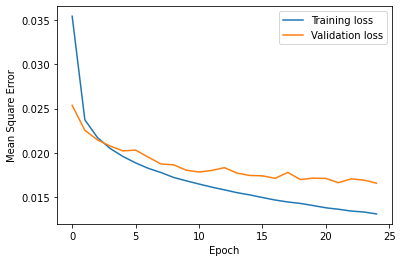

In [14]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

### Performance Evaluation
- Make prediction on testset and calculate testing accuracy
- Use a random set of images from the testset to visualize the actual vs predicted comparison

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.0178 - accuracy: 0.8783
Test accuracy: 0.8783000111579895


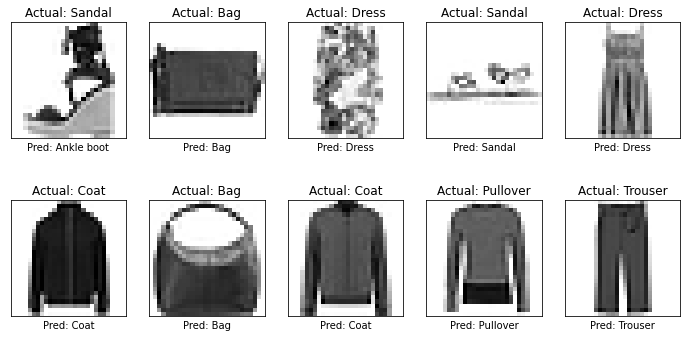

In [16]:
# Define a function to plot images with their true and predicted labels
def plot2(images, y_true, y_pred=None):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        # Plot image
        x = images[i]
        ax.imshow(x, cmap=plt.cm.binary)

        # Set title with true label
        ax.set_title(f"Actual: {class_names[np.argmax(y_true[i])]}")
        
        # If predicted labels are provided, set subtitle with predicted label
        if y_pred is not None:
            ax.set_xlabel(f"Pred: {class_names[y_pred[i]]}")

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
# Choose 10 random images from the test set
rand_idxs = np.random.permutation(len(x_test))[:10]

# Plot the images with their true and predicted labels
plot2(x_test[rand_idxs], y_test[rand_idxs], y_pred_labels[rand_idxs])


## Conclusion
Here we implemented a multilayer feed forward netwrok using `tensorflow.keras` to classify the Fashion MNIST data. The data was scaled and preprocessed before training using techniques such as one-hot encoding. The following are the findings:
- The model is able to achieve a testing accuracy of approximately 88%. 
- 10 random images from the testset were used as a comparison, the model made 9 correct prediction out of 10 images. 

##### Comparison with MLP from Scratch
The comparison of this model with the feed forward netwrok that was developed from scratch in [Task1_Deep_NN_scratch Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task1_Deep_NN_scratch.ipynb) shows that:
- **Testing Accuracy**: Scratch (~86%), Tensorflow (~88%)
- **Prediction Comparison**: Correct predictions out of 10 random images; scratch (9), Tensorflow (9)

Note: Same results are achieved using both methods for building the model. 